In [1]:
from IPython.display import Image, display

# 1 Search (or Detection)

# 1-1  레고블럭 찾기 : 홀수 돌기인 블럭만 찾아보자.

Pick up block which has only one upper.


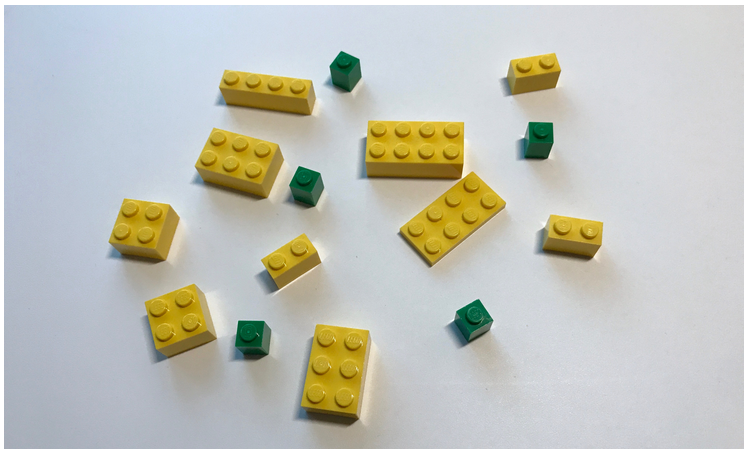

In [2]:
print('Pick up block which has only one upper.')
with open('input_with_label2.png', 'rb') as f:
    display(Image(f.read()))

# 1-2 어떤 모델이 잘 찾았는가 ?

A to F Model Result : ex A Model is correct result.


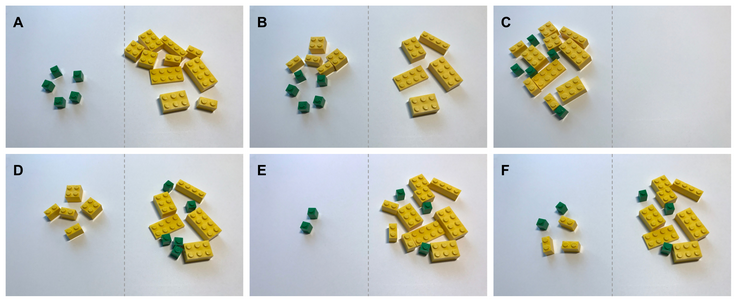

In [3]:
print('A to F Model Result : ex A Model is correct result.' )
with open('A_to_F_Model2.png', 'rb') as f:
    display(Image(f.read()))

# 2 Eval of Search

| Val | Real T | - |
|---|---|---|
| T | TP | ~ |
| - | ~ | - |

## 2-1 Search don't care Real F which is not searched yet.

# Eval of Classification

| - | Real T | Real F |
|---|---|---|
| Eval T | TP | FP |
| Eval F | FN | TN |

In [4]:
# Focus on Val T (Precision = pre)
# pre = TP / Val T
# 예측한 T를 기준으로 Real T일 비율

In [5]:
# Focus on Real T (Recal = re)
# re = TP / Real T
# Real T를 기준으로 예측한 T일 비율

In [6]:
# ref = https://tykimos.github.io/2017/05/22/Evaluation_Talk/

# 3 전수조사 vs 표본조사

F Model Result : ex 4x1 block is 35% likely to be odds by searched


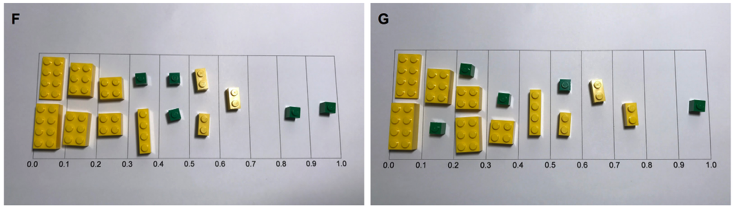

In [7]:
print('F Model Result : ex 4x1 block is 35% likely to be odds by searched')
with open('F_G_Model2.png', 'rb') as f:
    display(Image(f.read()))

Increase Threshold makes the difference.


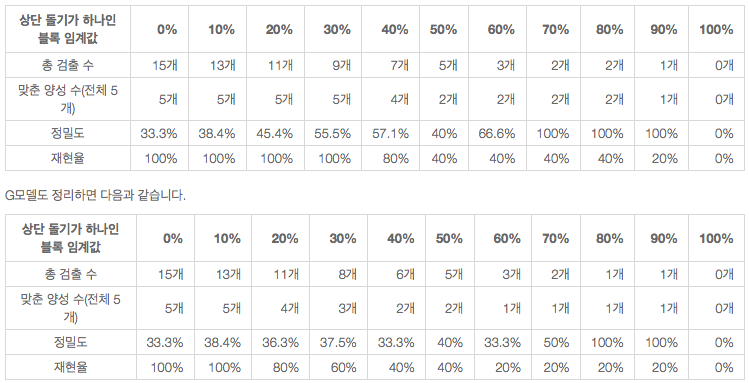

In [8]:
print('Increase Threshold makes the difference.')
with open('Threshold_makes_difference2.png', 'rb') as f:
    display(Image(f.read()))

In [9]:
# Threshold 50% 를 기준으로 F Model  is the same as G Model  based on Pre, Re.
# 검출 모델의 결과를 도형으로 평가할 수 있을까?

# 4 정밀도-재현율 그래프 Precision-Recall Graph

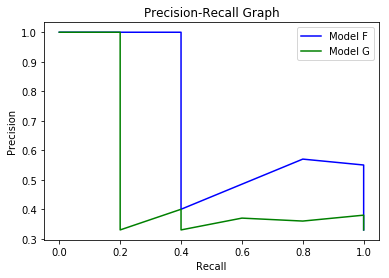

In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

precision_F = np.array([0.33, 0.38, 0.45, 0.55, 0.57, 0.40, 0.66, 1.0, 1.0, 1.0, 1.0])
recall_F = np.array([1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.2, 0.0])

precision_G = np.array([0.33, 0.38, 0.36, 0.37, 0.33, 0.40, 0.33, 0.5, 1.0, 1.0, 1.0])
recall_G = np.array([1.0, 1.0, 0.8, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.0])

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F')   
plt.plot(recall_G, precision_G, 'g', label = 'Model G') 

plt.legend(loc='upper right')
plt.show()

## 4-1 같은 re에 대해서 pre가 높을수록 좋은 검출 모델이다.
## 4-2 같은 pre에 대해서 re이 높을수록 좋은 검출 모델이다.
## 4-3 각 re에 해당하는 pre을 더해서 평균을 취한 것을 AP Average Precision 이라고 한다.
## 4-4 완벽한 검출 모델은 AP=1 이다.

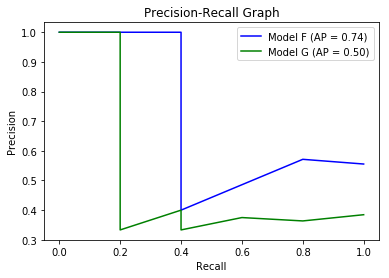

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 0.55, 0.55, 0.65, 0.75, 0.95])

precision_F, recall_F, _ = precision_recall_curve(class_F, proba_F)
precision_G, recall_G, _ = precision_recall_curve(class_G, proba_G)

ap_F = average_precision_score(class_F, proba_F)
ap_G = average_precision_score(class_G, proba_G)

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AP = %0.2F)'%ap_F)   
plt.plot(recall_G, precision_G, 'g', label = 'Model G (AP = %0.2F)'%ap_G)  

plt.legend(loc='upper right')
plt.show()

In [12]:
# F is bettern than G